# PROJET FINAL: Analyse de données et machine learning avec Python

Il s'agit d'analyser les données collectées sur la pandémie du covid 19 qui sont dans un fichier au format csv (voir dossier *data*).

In [31]:
#Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Étape 1 : Préparation et nettoyage des données

In [33]:
#Chargez le jeu de données  dans un *dataframe* à l'aide de Pandas.
df = pd.read_csv(r"C:/Users/DELL LATITUDE/Desktop/Data Analyst INPHB/Python pour l'analyse des données/ProjectFinal2023-2024/data/covid19_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [35]:
# Renommer les colonnes en français
df = df.rename(columns={
    'USMER': 'USMER',
    'MEDICAL_UNIT': 'Unité médicale',
    'SEX': 'Sexe',
    'PATIENT_TYPE': 'Type de patient',
    'DATE_DIED': 'Date de décès',
    'INTUBED': 'Intubé',
    'PNEUMONIA': 'Pneumonie',
    'AGE': 'Âge',
    'PREGNANT': 'Enceinte',
    'DIABETES': 'Diabète',
    'COPD': 'BPCO',
    'ASTHMA': 'Asthme',
    'INMSUPR': 'Immunosupprimé',
    'HIPERTENSION': 'Hypertension',
    'OTHER_DISEASE': 'Autres maladies',
    'CARDIOVASCULAR': 'Cardiovasculaire',
    'OBESITY': 'Obésité',
    'RENAL_CHRONIC': 'Insuffisance rénale chronique',
    'TOBACCO': 'Tabac',
    'CLASIFFICATION_FINAL': 'Classification finale',
    'ICU': 'USI',  # Unité de soins intensifs
    'DIED': 'Décédé'
})

print(df.columns)


Index(['USMER', 'Unité médicale', 'Sexe', 'Type de patient', 'Date de décès',
       'Intubé', 'Pneumonie', 'Âge', 'Enceinte', 'Diabète', 'BPCO', 'Asthme',
       'Immunosupprimé', 'Hypertension', 'Autres maladies', 'Cardiovasculaire',
       'Obésité', 'Insuffisance rénale chronique', 'Tabac',
       'Classification finale', 'USI'],
      dtype='object')


In [37]:
# 2. Exploration des données
df.head(100)

,USMER,Unité médicale,Sexe,Type de patient,Date de décès,Intubé,Pneumonie,Âge,Enceinte,Diabète,...,Asthme,Immunosupprimé,Hypertension,Autres maladies,Cardiovasculaire,Obésité,Insuffisance rénale chronique,Tabac,Classification finale,USI
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,1,1,1,9999-99-99,97,2,49,2,2,...,2,2,2,2,2,2,2,2,7,97
96,2,1,1,1,9999-99-99,97,2,24,2,2,...,2,2,2,2,2,2,2,2,7,97
97,2,1,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
98,2,1,2,1,9999-99-99,97,2,27,97,2,...,2,2,2,2,2,2,2,1,7,97


D'après les données que tu montres, il semble qu'il y ait des dates de décès invalides, comme 9999-99-99, qui sont probablement utilisées comme des valeurs par défaut pour indiquer qu'aucune date de décès n'a été renseignée. Pour traiter ces valeurs, il serait important de les remplacer ou de les supprimer.

In [39]:
# Remplacer les dates invalides par NaT dans la colonne 'Date de décès'
df['Date de décès'] = pd.to_datetime(df['Date de décès'], errors='coerce')

In [41]:
#Nombre de lignes et de colonnes
print(df.shape) 

(1048575, 21)


In [40]:
#Statistiques descriptives
print(df.describe())

              USMER  Unité médicale          Sexe  Type de patient  \
count  1.048575e+06    1.048575e+06  1.048575e+06     1.048575e+06   
mean   1.632194e+00    8.980565e+00  1.499259e+00     1.190765e+00   
min    1.000000e+00    1.000000e+00  1.000000e+00     1.000000e+00   
25%    1.000000e+00    4.000000e+00  1.000000e+00     1.000000e+00   
50%    2.000000e+00    1.200000e+01  1.000000e+00     1.000000e+00   
75%    2.000000e+00    1.200000e+01  2.000000e+00     1.000000e+00   
max    2.000000e+00    1.300000e+01  2.000000e+00     2.000000e+00   
std    4.822084e-01    3.723278e+00  4.999997e-01     3.929041e-01   

                       Date de décès        Intubé     Pneumonie  \
count                          30492  1.048575e+06  1.048575e+06   
mean   2020-06-25 13:50:19.126328320  7.952288e+01  3.346831e+00   
min              2020-01-02 00:00:00  1.000000e+00  1.000000e+00   
25%              2020-04-05 00:00:00  9.700000e+01  2.000000e+00   
50%              2020-07-05 0

In [43]:
# 3. Traiter les données manquantes, incorrectes et invalides
print(df.isna().sum())

USMER                                  0
Unité médicale                         0
Sexe                                   0
Type de patient                        0
Date de décès                    1018083
Intubé                                 0
Pneumonie                              0
Âge                                    0
Enceinte                               0
Diabète                                0
BPCO                                   0
Asthme                                 0
Immunosupprimé                         0
Hypertension                           0
Autres maladies                        0
Cardiovasculaire                       0
Obésité                                0
Insuffisance rénale chronique          0
Tabac                                  0
Classification finale                  0
USI                                    0
dtype: int64


In [45]:
df.head(1000)

,USMER,Unité médicale,Sexe,Type de patient,Date de décès,Intubé,Pneumonie,Âge,Enceinte,Diabète,...,Asthme,Immunosupprimé,Hypertension,Autres maladies,Cardiovasculaire,Obésité,Insuffisance rénale chronique,Tabac,Classification finale,USI
0,2,1,1,1,2020-03-05,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,2020-03-06,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,2020-09-06,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,2020-12-06,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,NaT,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,3,2,2,NaT,2,1,52,97,1,...,2,2,1,2,2,2,2,2,3,2
996,1,3,2,2,NaT,1,1,70,97,1,...,2,2,1,2,2,1,2,1,3,1
997,1,3,2,2,NaT,2,1,52,97,2,...,2,2,2,2,2,2,2,2,3,2
998,1,3,1,2,NaT,1,1,50,2,1,...,2,2,1,2,2,2,2,2,6,1


In [47]:
# 4. Analyse supplémentaire
# Ajouter une colonne "décès" pour indiquer si un patient est décédé (1) ou non (0)
df['décès'] = df['Date de décès'].notnull().astype(int)
# Supprimer les lignes où la date de décès est manquante
df = df.dropna(subset=['Date de décès'])

In [49]:
df.head(160-2000)

,USMER,Unité médicale,Sexe,Type de patient,Date de décès,Intubé,Pneumonie,Âge,Enceinte,Diabète,...,Immunosupprimé,Hypertension,Autres maladies,Cardiovasculaire,Obésité,Insuffisance rénale chronique,Tabac,Classification finale,USI,décès
0,2,1,1,1,2020-03-05,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,2020-03-06,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,2020-09-06,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,2020-12-06,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
152,1,2,2,2,2020-05-04,1,1,14,97,2,...,2,2,2,2,2,2,2,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464010,2,12,2,2,2020-07-07,2,1,71,97,2,...,2,2,2,2,1,2,1,3,2,1
464011,2,12,1,2,2020-07-07,2,1,59,2,2,...,2,2,2,2,1,2,2,3,2,1
464012,1,12,2,2,2020-07-07,1,1,41,97,2,...,2,1,2,2,1,2,2,3,2,1
464013,1,12,2,2,2020-07-07,2,1,72,97,1,...,2,2,2,2,2,2,2,3,2,1


In [51]:
# Vérifier s'il y a des NaN dans tout le DataFrame
if df.isna().sum().sum() == 0:
    print("Il n'y a plus de valeurs manquantes dans le DataFrame.")
else:
    print("Il y a encore des valeurs manquantes.")


Il n'y a plus de valeurs manquantes dans le DataFrame.


## Etape 2:  Effectuer une analyse exploratoire et une visualisation

In [53]:
# Résumé statistique des colonnes numériques
statistiques = df.describe()
print(statistiques)

             USMER  Unité médicale          Sexe  Type de patient  \
count  30492.00000    30492.000000  30492.000000     30492.000000   
mean       1.43841        7.008068      1.643513         1.911091   
min        1.00000        1.000000      1.000000         1.000000   
25%        1.00000        4.000000      1.000000         2.000000   
50%        1.00000        4.000000      2.000000         2.000000   
75%        2.00000       12.000000      2.000000         2.000000   
max        2.00000       13.000000      2.000000         2.000000   
std        0.49620        3.673661      0.478969         0.284616   

                       Date de décès        Intubé     Pneumonie  \
count                          30492  30492.000000  30492.000000   
mean   2020-06-25 13:50:19.126328320     12.648104      2.139906   
min              2020-01-02 00:00:00      1.000000      1.000000   
25%              2020-04-05 00:00:00      1.000000      1.000000   
50%              2020-07-05 00:00:00  

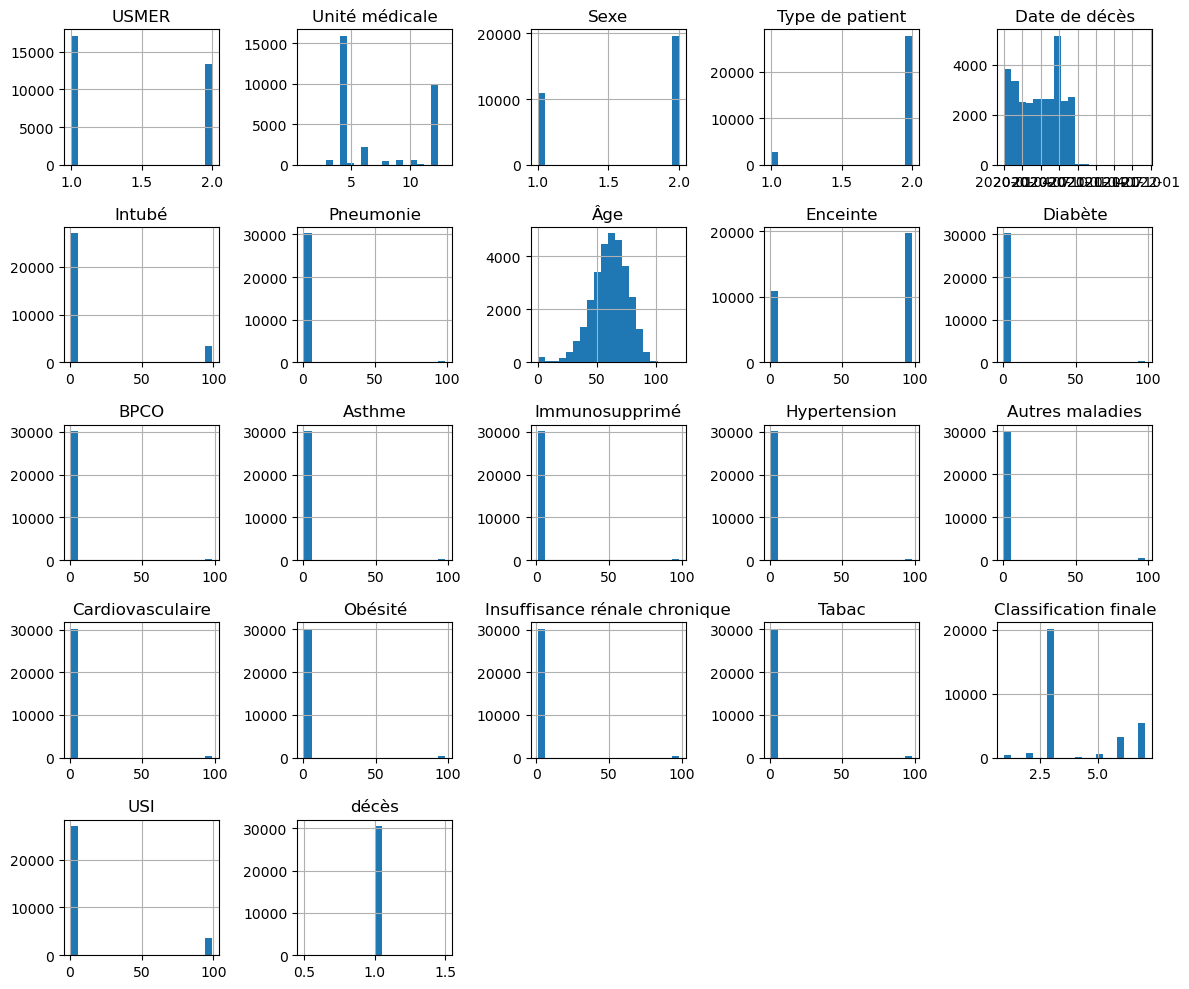

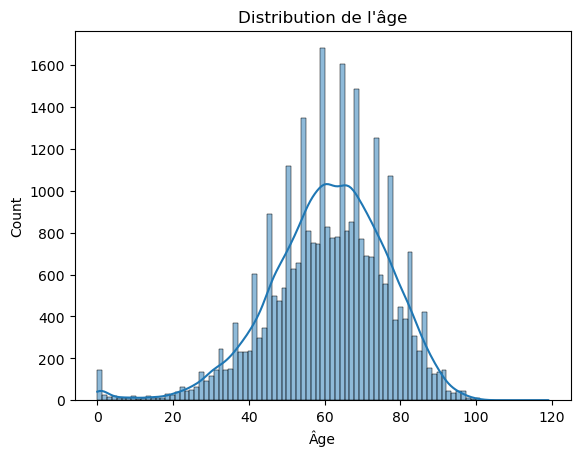

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogrammes pour chaque colonne numérique
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Ou créer un histogramme pour une colonne spécifique, par exemple l'Âge
sns.histplot(df['Âge'], kde=True)
plt.title('Distribution de l\'âge')
plt.show()


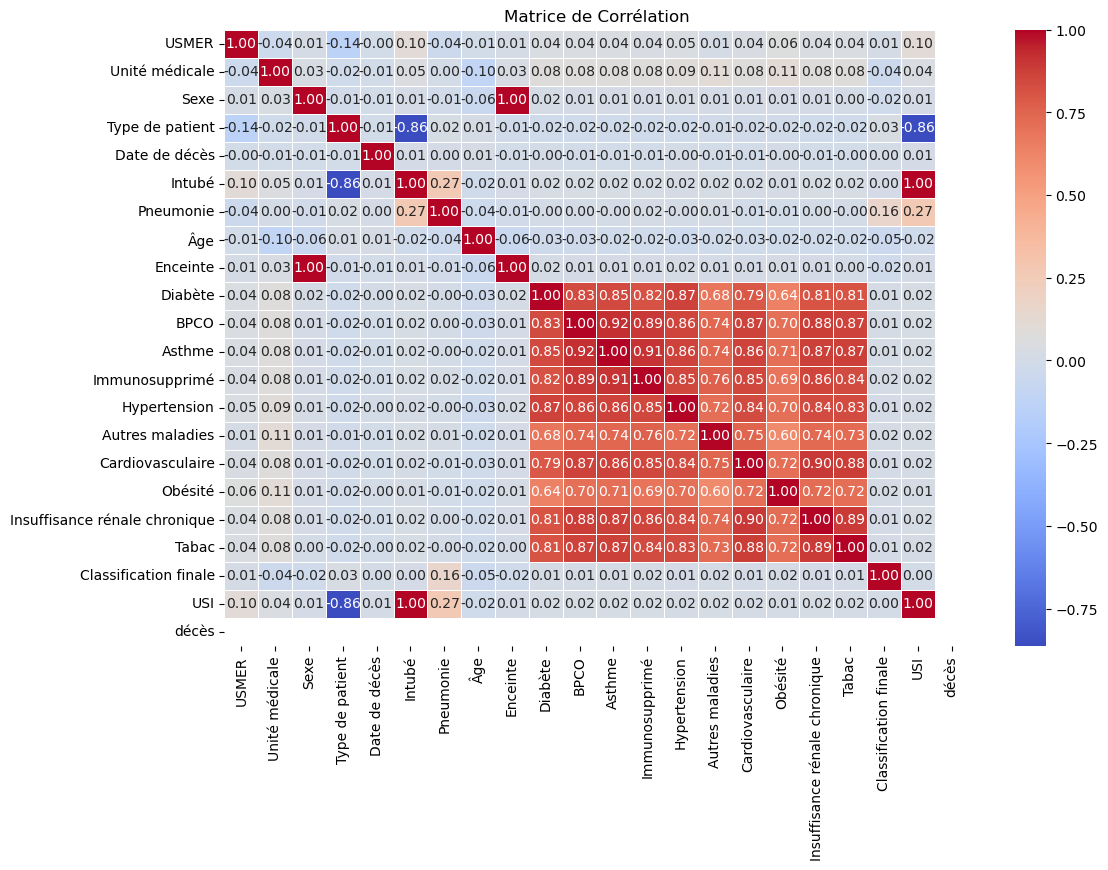

In [56]:
# Calculer la matrice de corrélation
corr = df.corr()

# Visualiser la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()


- Les parties en rouge presente les relation ou nous avons plus de correlation posiive, cela signifie que lorsque la valeur d'une variable augmente, la valeur de l'autre variable a également tendance à augmenter.Par exemple, on observes une forte corrélation positive entre le tabac et l'insufisance renale chronique.Plus la couleur est rouge, plus la corrélation est forte, ce qui indique une relation très positive.
Valeurs proches de 1 : Une corrélation de 1 signifie une relation parfaitement linéaire et positive entre les deux variables.
- Les zones bleues représentent les corrélations négatives fortes entre deux variables, lorsque la valeur d'une variable augmente, la valeur de l'autre variable a tendance à diminuer. Par exemple,  "le type de patient" et "USI". Plus la couleur est bleue, plus la corrélation est forte et négative.
Valeurs proches de -1 : Une corrélation de -1 signifie une relation parfaitement linéaire et négative entre les deux variables.

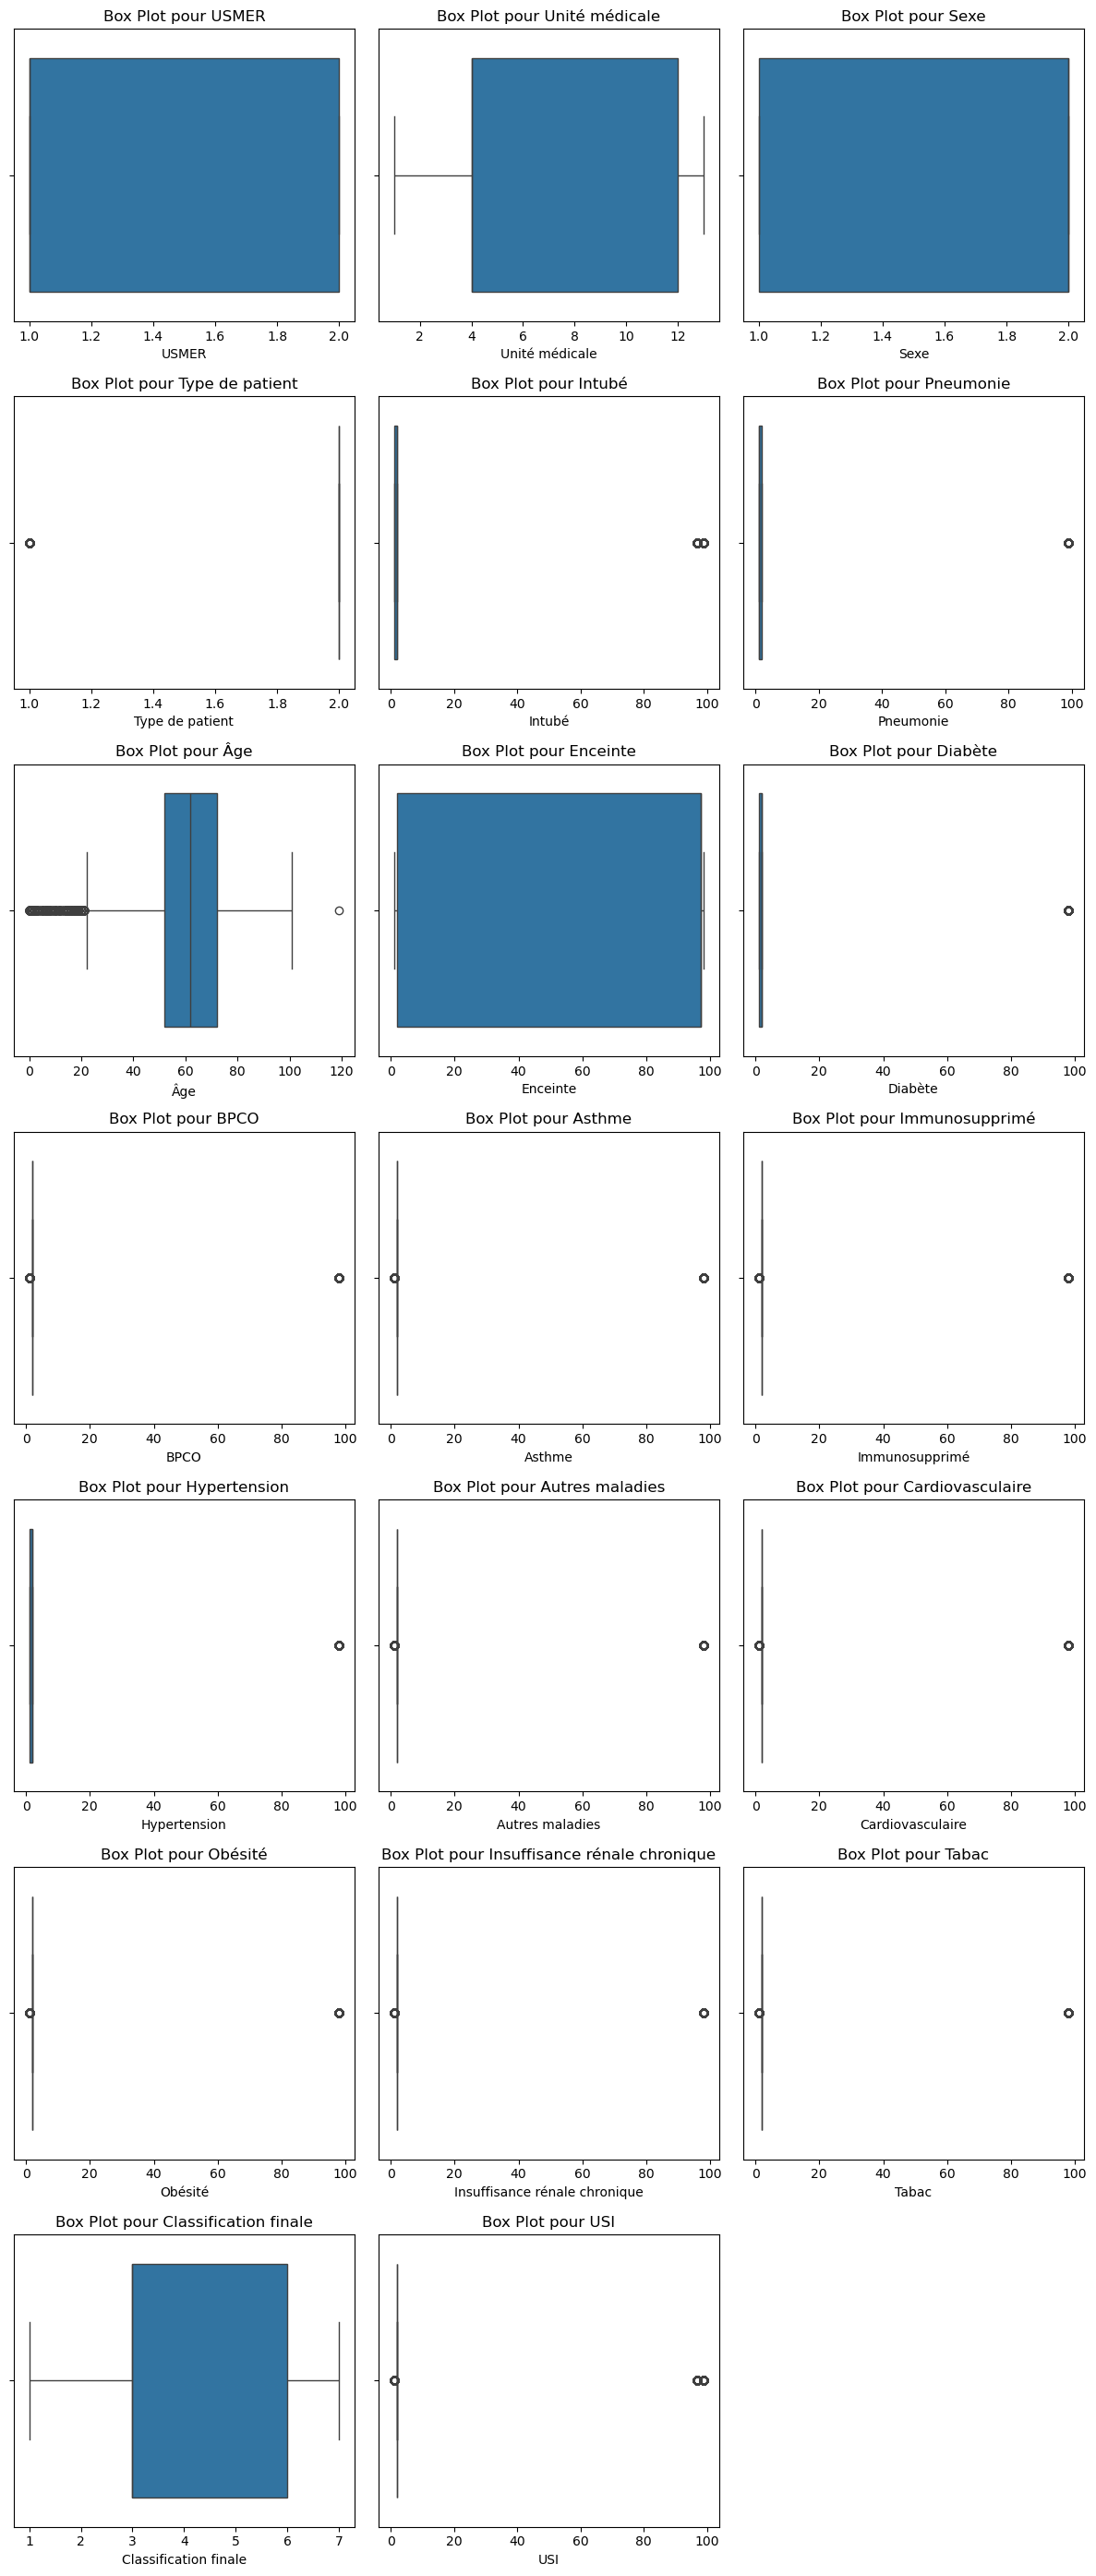

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sélectionner les colonnes numériques (quantitatives)
quantitative_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Calculer les dimensions de la grille en fonction du nombre de variables
n_vars = len(quantitative_vars)
n_rows = int(np.ceil(n_vars / 3))  # Calculer le nombre de lignes (3 colonnes)
n_cols = 3  # Fixer le nombre de colonnes à 3

# Créer les box plots pour toutes les variables quantitatives
plt.figure(figsize=(12, 4 * n_rows))

for i, var in enumerate(quantitative_vars, 1):
    plt.subplot(n_rows, n_cols, i)  # Subplot dynamique en fonction du nombre de variables
    sns.boxplot(data=df, x=var)
    plt.title(f'Box Plot pour {var}')
    plt.xlabel(var)

plt.tight_layout()  # Ajuste la disposition des sous-graphiques
plt.show()


comme les graphique le presente il existe plusieurs cas de valeur aberante dans les variables comme le diabete,l'ashme....

In [61]:
# Liste des variables pour lesquelles vous souhaitez supprimer les valeurs aberrantes
variables_to_check = ['Âge', 'Diabète', 'BPCO', 'Asthme', 'Immunosupprimé', 
                      'Hypertension', 'Autres maladies', 'Cardiovasculaire', 
                      'Obésité', 'Insuffisance rénale chronique', 'Tabac', 'USI']

# Fonction pour supprimer les valeurs aberrantes en utilisant l'IQR
def remove_outliers(df, columns):
    for col in columns:
        # Calcul des Q1 et Q3
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calcul de l'IQR
        IQR = Q3 - Q1
        
        # Définir les bornes pour les valeurs normales
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrer les valeurs aberrantes
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

# Appliquer la fonction pour supprimer les valeurs aberrantes
df_clean = remove_outliers(df, variables_to_check)

# Vérifier la taille avant et après
print(f"Avant nettoyage : {df.shape}")
print(f"Après nettoyage : {df_clean.shape}")


Avant nettoyage : (30492, 22)
Après nettoyage : (12812, 22)


## Étape 3: Posez des questions sur les données et répondez-y

In [63]:
# Calcul de l'âge moyen des patients
mean_age = df['Âge'].mean()
print(f"L'âge moyen des patients est de {mean_age:.2f} ans.")


L'âge moyen des patients est de 61.02 ans.


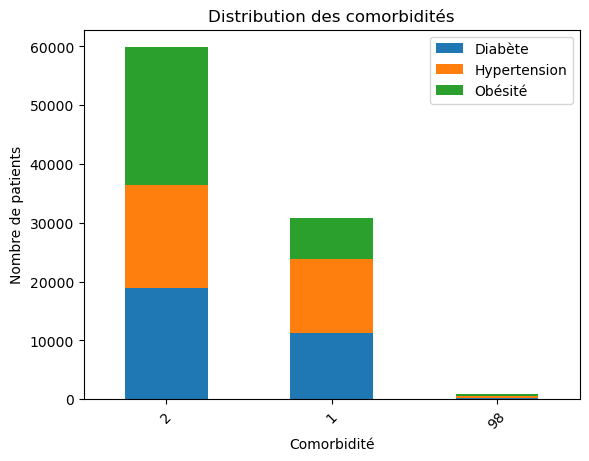

In [65]:
##Quelle est la distribution des patients ayant des comorbidités (par exemple, diabète, hypertension, obésité) ?
## Création d'un tableau des comorbidités
comorbidities = ['Diabète', 'Hypertension', 'Obésité']
df_comorbidities = df[comorbidities].apply(pd.Series.value_counts)

# Visualisation de la distribution des comorbidités
df_comorbidities.plot(kind='bar', stacked=True)
plt.title("Distribution des comorbidités")
plt.xlabel("Comorbidité")
plt.ylabel("Nombre de patients")
plt.xticks(rotation=45)
plt.show()


In [67]:
##Les patients ayant des comorbidités comme le diabète ou l'hypertension ont-ils un taux de décès plus élevé ?
# Taux de décès pour les patients ayant le diabète
taux_de_décès_diabète = df[df['Diabète'] == 2]['décès'].mean()

# Taux de décès pour les patients ayant l'hypertension
taux_de_mortalité_hypertension = df[df['Hypertension'] == 2]['décès'].mean()

print(f"Taux de décès chez les patients diabétiques : {taux_de_décès_diabète:.2f}")
print(f"Taux de décès chez les patients hypertendus : {taux_de_mortalité_hypertension:.2f}")


Taux de décès chez les patients diabétiques : 1.00
Taux de décès chez les patients hypertendus : 1.00


In [69]:
##Quel est le pourcentage de patients qui ont été intubés par rapport à ceux qui ne l'ont pas été
# Calcul du pourcentage de patients intubés
intubation_percentage = df['Intubé'].value_counts(normalize=True) * 100
print(f"Pourcentage de patients intubés : {intubation_percentage[2]:.2f}%")
print(f"Pourcentage de patients non intubés : {intubation_percentage[1]:.2f}%")


Pourcentage de patients intubés : 54.49%
Pourcentage de patients non intubés : 34.00%


In [71]:
# Création de la colonne "à risque"
df['À risque'] = ((df['Âge'] > 65) | (df['Diabète'] == 2) | (df['Hypertension'] == 2) | (df['Obésité'] == 2)).astype(int)

Nous avons créer une nouvelle colonne qui sera égale à 1 si le patient a des comorbidités (diabète, hypertension, obésité) ou est âgé de plus de 65 ans, sinon elle sera égale à 0.

In [73]:
# Regroupement par diabète et calcul du taux de décès moyen
taux_de_mortalité_par_diabète = df.groupby('Diabète')['décès'].mean()
print(taux_de_mortalité_par_diabète)

Diabète
1     1.0
2     1.0
98    1.0
Name: décès, dtype: float64


In [362]:
## Étape 4 : résumez vos déductions et rédigez une conclusion.

## Étape 5: Faites des prédictions

In [369]:
pip install scikit-learn


  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0


In [376]:
pip install threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [381]:
!pip install --upgrade threadpoolctl

In [387]:
!pip uninstall threadpoolctl -y
!pip install threadpoolctl

Found existing installation: threadpoolctl 3.5.0
Uninstalling threadpoolctl-3.5.0:
  Successfully uninstalled threadpoolctl-3.5.0
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [396]:
pip install --upgrade threadpoolctl scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [75]:
df.head(100)


,USMER,Unité médicale,Sexe,Type de patient,Date de décès,Intubé,Pneumonie,Âge,Enceinte,Diabète,...,Hypertension,Autres maladies,Cardiovasculaire,Obésité,Insuffisance rénale chronique,Tabac,Classification finale,USI,décès,À risque
0,2,1,1,1,2020-03-05,97,1,65,2,2,...,1,2,2,2,2,2,3,97,1,1
1,2,1,2,1,2020-03-06,97,1,72,97,2,...,1,2,2,1,1,2,5,97,1,1
2,2,1,2,2,2020-09-06,1,2,55,97,1,...,2,2,2,2,2,2,3,2,1,1
3,2,1,1,1,2020-12-06,97,2,53,2,2,...,2,2,2,2,2,2,7,97,1,1
152,1,2,2,2,2020-05-04,1,1,14,97,2,...,2,2,2,2,2,2,7,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2,3,1,2,2020-10-05,2,1,83,2,2,...,1,2,2,2,2,2,7,2,1,1
504,2,3,2,2,2020-10-05,2,1,45,97,2,...,2,2,2,2,2,2,7,2,1,1
505,1,3,1,2,2020-11-05,1,2,39,2,2,...,2,2,2,2,2,2,3,2,1,1
506,1,3,2,2,2020-11-05,2,1,41,97,1,...,2,2,2,2,2,1,3,1,1,1


In [78]:
print(df.columns)

Index(['USMER', 'Unité médicale', 'Sexe', 'Type de patient', 'Date de décès',
       'Intubé', 'Pneumonie', 'Âge', 'Enceinte', 'Diabète', 'BPCO', 'Asthme',
       'Immunosupprimé', 'Hypertension', 'Autres maladies', 'Cardiovasculaire',
       'Obésité', 'Insuffisance rénale chronique', 'Tabac',
       'Classification finale', 'USI', 'décès', 'À risque'],
      dtype='object')


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Vérification si la colonne cible existe
if 'À risque' in df.columns:
    # Définir X (variables explicatives) et y (variable cible)
    X = df.drop(columns=['À risque'])  
    y = df['À risque']  # Colonne cible
    
    # Division des données : 80% pour l'entraînement, 20% pour le test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print("Les données ont été divisées avec succès !")
    print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
    print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")
else:
    print("La colonne cible 'À risque' n'existe pas dans le DataFrame.")


Les données ont été divisées avec succès !
X_train: (24393, 22), X_test: (6099, 22)
y_train: (24393,), y_test: (6099,)


In [ ]:
###Créer et entraîner les modèles

In [79]:
# Vérification des types de données dans le DataFrame
print(df.dtypes)

# Si vous avez des colonnes datetime, convertissez-les en caractéristiques numériques
# Exemple : extraire l'année, le mois, le jour, etc. d'une colonne datetime 'date_column'
if 'date_column' in df.columns:
    df['year'] = df['date_column'].dt.year
    df['month'] = df['date_column'].dt.month
    df['day'] = df['date_column'].dt.day
    df.drop(columns=['date_column'], inplace=True)  # Supprimer la colonne d'origine si elle n'est plus nécessaire

# Séparer X et y
X = df.drop(columns=['À risque'])  # Supposons que 'À risque' est la colonne cible
y = df['À risque']

# Assurez-vous que toutes les colonnes de X sont numériques
X = X.select_dtypes(include=[int, float])  # Garder seulement les colonnes numériques

# Diviser en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialisation des modèles
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Entraînement et évaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
    recall = recall_score(y_test, y_pred, average='binary', zero_division=0)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

    print(f"Rapport pour {model_name}:\n")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("-" * 50)

# Résumé des performances
import pandas as pd
results_df = pd.DataFrame(results).T
print("\nRésumé des performances :")
print(results_df)

USMER                                     int64
Unité médicale                            int64
Sexe                                      int64
Type de patient                           int64
Date de décès                    datetime64[ns]
Intubé                                    int64
Pneumonie                                 int64
Âge                                       int64
Enceinte                                  int64
Diabète                                   int64
BPCO                                      int64
Asthme                                    int64
Immunosupprimé                            int64
Hypertension                              int64
Autres maladies                           int64
Cardiovasculaire                          int64
Obésité                                   int64
Insuffisance rénale chronique             int64
Tabac                                     int64
Classification finale                     int64
USI                                     

#SAUVEGARDER LE MODELE

In [85]:
import pickle

# Sauvegarder le modèle Random Forest
with open("covid_pred.pkl", "wb") as file:
    pickle.dump(models["Random Forest"], file)
